<h1 style='color: yellow'> Metric Generator </h1>

Generates all the ToE metrics

In [1]:
# Standard Library Imports
import os
import sys
from importlib import reload
from functools import partial
from enum import Enum
from typing import NamedTuple
from time import sleep, time

# Third-Party Library Imports
import numpy as np
from numpy.typing import ArrayLike
import pandas as pd
import xarray as xr
from scipy.stats import spearmanr
# Plotting imports
import hvplot.xarray
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker as mticker
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import seaborn as sns
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# My imports
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts'))
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts', 'src'))
import constants
import utils
import plotting_utils
import climate_utils
import stats
import diagnostic_tools

import time_of_emergence_calc as toe_calc
import time_of_emergence_data_analysis as toe_da
import toe_constants as toe_const
import open_data
from toe_constants import PVALUE_THESHOLD1, OVERLAP_THRESHOLD, SN_THRESHOLD1
import time_of_emergence_plots
import toe_constants as toe_const
import plotting_utils
import misc
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', message="p-value floored: true value smaller than 0.001")
warnings.filterwarnings('ignore', message="p-value capped: true value larger than 0.25")

Matplotlib created a temporary cache directory at /jobfs/132111423.gadi-pbs/matplotlib-drp_sm19 because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
xr.set_options(display_expand_data=False)

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='numpy.lib.function_base')

In [4]:
# import matplotlib.pylab as pylab
# pylab.rcParams.update({'axes.labelsize':20, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'figure.figsize': [12, 6]})

In [5]:
# client.close()

In [130]:
# from dask.distributed import Client
# client = Client(threads_per_worker=1, n_workers=20)
client.close()
client = Client(n_workers=50, threads_per_worker=4, memory_limit=None) 

client

 - Closing Nanny at 'tcp://127.0.0.1:42569'. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:34349'. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:38221'. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:42251'. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:36157'. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:34271'. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:41527'. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:35465'. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:35723'. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:40367'. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:44539'. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:33277'. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:33725'. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Closing Nanny at 'tcp://127.0.0.1:40187'. Reas

2025-01-10 16:04:40,019 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('open_dataset-tmax-db9e79034c39a6485c1a4a52fb4a13bd', 0, 3, 3))" coro=<Worker.execute() done, defined at /g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError
2025-01-10 16:04:40,020 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('open_dataset-tmax-db9e79034c39a6485c1a4a52fb4a13bd', 0, 0, 3))" coro=<Worker.execute() done, defined at /g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError


 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny-close
 - Nanny asking worker to close. Reason: nanny

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/35537/status,
Dashboard: /proxy/35537/status,Workers: 50
Total threads: 200,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38585,Workers: 50
Dashboard: /proxy/35537/status,Total threads: 200
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:43023,Total threads: 4
Dashboard: /proxy/43141/status,Memory: 0 B
Nanny: tcp://127.0.0.1:35617,


 - Event loop was unresponsive in Nanny for 3.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 3.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 3.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 3.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 3.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
 - Event loop was unresponsive in Nanny for 3.51s.  This is often caused by long

In [7]:
xr.set_options(display_expand_attrs=False)
xr.set_options(display_expand_data=True)
np.set_printoptions(precision=2, suppress=True, edgeitems=1)

In [8]:
# data_ds = open_data.open_access_precip(resample='QS-DEC').isel(time=slice(1, None))
# data_ds = open_data.open_gpcc(resample='QS-DEC')
# Precip variables must have extra selections
# data_ds = data_ds.sel(time=data_ds.time.dt.month==12)

In [64]:
# data_ds = open_data.open_best()
# Potential era5 variables - cape, skt (skin temperature), smlt (snow melt)
# data_ds = open_data.open_era5('tmax', resample_method='max', save=True).isel(time=slice(None, -1))
# data_ds = open_data.open_era5('tmax', return_raw=True, logginglevel='DEBUG')

 - New Variable - attempting to open tmax from /g/data/rt52/era5/single-levels/monthly-averaged
 - full_path='/g/data/rt52/era5/single-levels/monthly-averaged/tmax/*/*.nc'


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x14c8133befb0>>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Process Dask Worker process (from Nanny):
2025-01-10 15:34:18,243 - distributed.nanny - ERROR - Worker process died unexpectedly
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/nanny.py", line 1019, in _run
    asyncio_run(run(), loop_factory=get_loop_factory())
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/compatibility.py", line 239, in asyncio_run
    _cancel_all_tasks(loop)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.

In [91]:
from glob import glob

In [104]:
path = '/g/data/rt52/era5/single-levels/reanalysis/tmax/*/*.nc'
files_to_open = glob(path, recursive=True)
print(len(files_to_open))
files_to_open = [f for f in files_to_open if int(f.split('/')[-2]) > 1958]
len(files_to_open)

1017


789

In [107]:
# for f in files_to_open:
#     print(f)
#     xr.open_dataset(f)

In [118]:
data_ds = xr.open_mfdataset(
    files_to_open, #path,
    combine="by_coords",
    # parallel=True,
    # lock=False,  # Disable file locking (good for reach only)
    chunks=open_data.ERA5_CHUNKS, 
    use_cftime=True,
).tmax

In [121]:
data_ds = data_ds

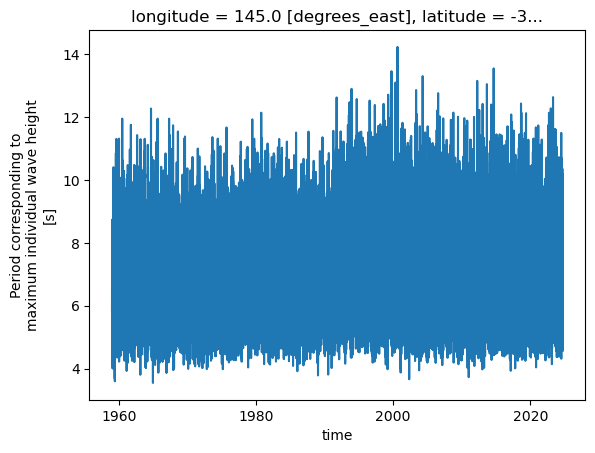

In [124]:
data_ds.sel(latitude=-39, longitude=145, method='nearest').plot()

In [125]:
data_ds_resample = data_ds.resample(time='YE').max()

 - Entering _validate_reindex: reindex is None
 - Leaving _validate_reindex: method = None, returning None
 - _choose_engine: Choosing 'flox'
 - Using threadpool since num_labels 66 < 2 * chunksize 744
 - find_group_cohorts: cohorts is preferred, chunking is perfect.
 - _choose_method: method is None
 - _choose_method: choosing preferred_method=cohorts
 - Entering _validate_reindex: reindex is None
 - Leaving _validate_reindex: reindex is False


In [127]:
data_ds_resample = data_ds_resample.rename({'latitude': 'lat', 'longitude': 'lon'})

In [131]:
data_ds_resample = data_ds_resample.compute()

In [132]:
data_ds_resample = data_ds_resample.chunk(open_data.ERA5_CHUNKS)

In [144]:
720/24

30.0

In [146]:
data_ds_resample = data_ds_resample.chunk({'time':-1, 'lat': 361//19, 'lon':720//24})

In [149]:
data_ds_resample.chunks

((66,),
 (19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19),
 (30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30))

In [150]:
SAVE_NAME = '/g/data/w40/ab2313/time_of_emergence/era5/tmax.zarr'

data_ds_resample.to_zarr(SAVE_NAME, mode='w')

In [78]:
# np.array(os.listdir('/g/data/rt52/era5/single-levels'))
# np.array(os.listdir('/g/data/rt52/era5/single-levels/monthly-averaged'))

In [22]:
# def calculate_chunks(dataset, total_chunks=100):
#     """
#     Calculate chunk sizes for a dataset to divide it into a specified total number of chunks.

#     Args:
#         dataset (xr.Dataset): The input dataset.
#         total_chunks (int): Desired total number of chunks.

#     Returns:
#         dict: A dictionary of chunk sizes for each dimension.
#     """
#     # Get the sizes of all dimensions
#     sizes = dataset.sizes

#     # Start with an empty dictionary for chunk sizes
#     chunk_sizes = {}

#     # Split the chunking priority: time as a single chunk, others divided
#     time_size = sizes['time']
#     spatial_dims = {k: v for k, v in sizes.items() if k != 'time'}

#     # Assign a single chunk to 'time'
#     chunk_sizes['time'] = -1

#     # Calculate the total spatial size (excluding time)
#     spatial_total_size = sum(spatial_dims.values())

#     # Divide the total_chunks proportionally among spatial dimensions
#     spatial_chunks = {
#         dim: max(1, round((size / spatial_total_size) * total_chunks)) for dim, size in spatial_dims.items()
#     }

#     # Calculate chunk sizes for each spatial dimension
#     for dim, size in spatial_dims.items():
#         # Divide dimension size by the number of chunks and ensure no empty chunks
#         chunk_sizes[dim] = max(1, size // spatial_chunks[dim])

#     return chunk_sizes


In [46]:
def chunk_lat_lon(ds, num_chunks, lat_name='lat', lon_name='lon'):
    """
    Calculate chunk sizes for a dataset to divide lat and lon into approximately `num_chunks` total chunks,
    while keeping the 'time' dimension unchunked.

    Args:
        ds (xr.Dataset): The input dataset.
        num_chunks (int): The desired total number of chunks for lat and lon combined.
        lat_name (str): The name of the latitude dimension in the dataset. Default is 'lat'.
        lon_name (str): The name of the longitude dimension in the dataset. Default is 'lon'.

    Returns:
        dict: A dictionary of chunk sizes for 'time', 'lat', and 'lon'.
    """
    # Calculate the square root of the total number of chunks
    num_chunks_sqrt = int(np.sqrt(num_chunks))

    # Get the sizes of the latitude and longitude dimensions
    dim_sizes = ds.sizes

    # Calculate chunk sizes for latitude and longitude
    lat_chunk_size = dim_sizes[lat_name] // num_chunks_sqrt
    lon_chunk_size = dim_sizes[lon_name] // num_chunks_sqrt

    # Define chunk sizes for the dataset
    chunks = {'time': -1, lat_name: lat_chunk_size, lon_name: lon_chunk_size}
    
    return chunks

In [49]:
assert len(data_ds.chunksizes['time']) == 1

In [95]:
# data_ds.mean(dim=['latitude', 'longitude']).plot()

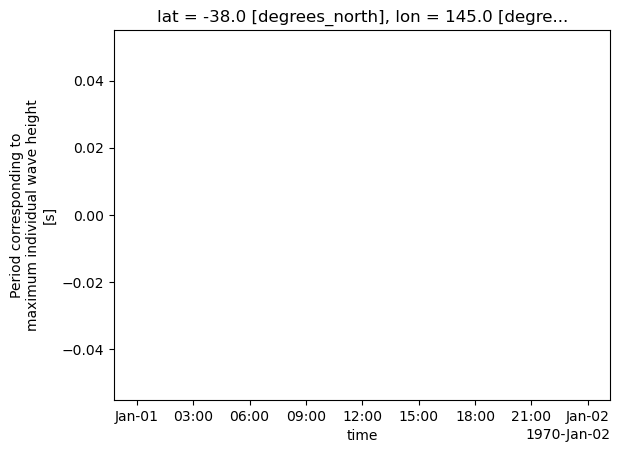

In [13]:
data_ds.sel(lat=-38, lon=145, method='nearest').plot()

In [14]:
t_start = time()

In [15]:
# Create a data set for the base period used as the pre-industrial climate 
# base_period = #(1959, 1989)#(1900, 1950)#(1900, 1931)
base_period = toe_const.YearRange.MODERN_PERIOD
base_period, base_period.start, base_period.end

(<YearRange.MODERN_PERIOD: (1959, 1989)>, 1959, 1989)

In [16]:
dataset_name, variable =  data_ds.dataset_name, data_ds.name
dataset_name, variable

('era5', 'tmax')

In [17]:
os.listdir(constants.TOE_SAVE_DIR)

['best_temperature_(1959_1989)',
 'era5_t2m_(1959_1989)',
 'old',
 'access_pr_(1959_1989)',
 '.ipynb_checkpoints',
 'error']

In [18]:
VAR_SAVE_DIR = os.path.join(constants.TOE_SAVE_DIR,
                            f'{dataset_name}_{variable}_({base_period.start}_{base_period.end})')
VAR_SAVE_DIR

'/g/data/w40/ab2313/time_of_emergence/toe_metrics/era5_tmax_(1959_1989)'

In [19]:
# os.makedirs(VAR_SAVE_DIR, exist_ok=True)
# I actually do want error if already exists
# os.rmdir(VAR_SAVE_DIR)
# os.mkdir(VAR_SAVE_DIR)

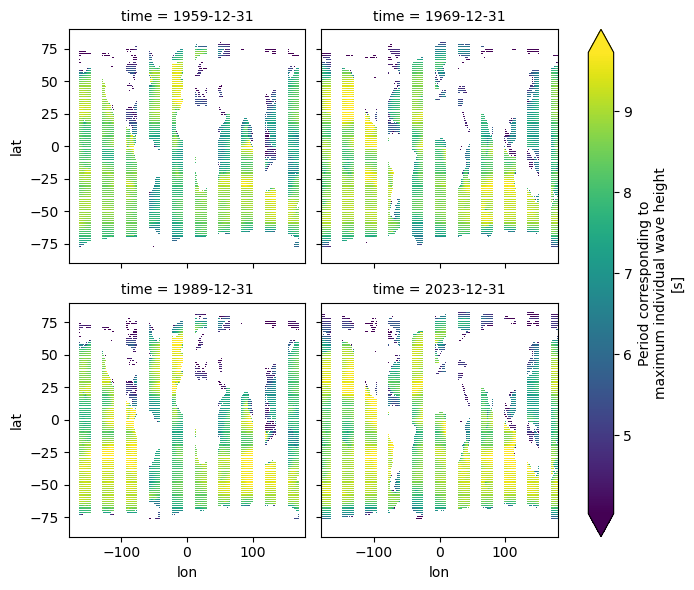

In [20]:
data_ds.isel(time=[0, 10, 30, -1]).plot(col='time', col_wrap=2, robust=True)

In [21]:
len(data_ds.time.values), np.take(data_ds.time.values, [0, 1,2, -3, -2, -1])

(65,
 array(['1959-12-31T00:00:00.000000000', '1960-12-31T00:00:00.000000000',
        '1961-12-31T00:00:00.000000000', '2021-12-31T00:00:00.000000000',
        '2022-12-31T00:00:00.000000000', '2023-12-31T00:00:00.000000000'],
       dtype='datetime64[ns]'))

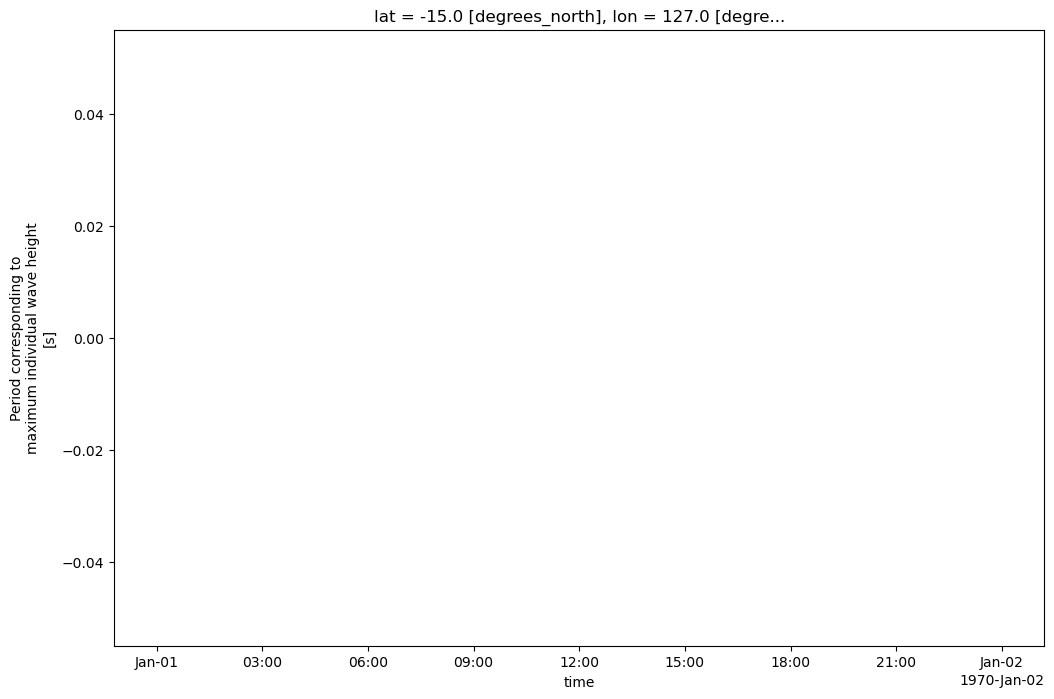

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
data_ds.sel(lat=-15, lon=127, method='nearest').plot(ax=ax)

In [23]:
# Calculate statistics
min_val = data_ds.min().values.item()
q25_val = data_ds.reduce(np.nanpercentile, q=25).values.item()
q75_val = data_ds.reduce(np.nanpercentile, q=75).values.item()
max_val = data_ds.max().values.item()

# Display nicely
print(f"Statistics:\n"
      f"Min: {min_val:.2f}\n"
      f"25th Percentile: {q25_val:.2f}\n"
      f"75th Percentile: {q75_val:.2f}\n"
      f"Max: {max_val:.2f}")


Statistics:
Min: 1.99
25th Percentile: 7.60
75th Percentile: 9.01
Max: 11.80


In [24]:
# Remove data that occurs before this
data_ds = data_ds.sel(time=data_ds.time.dt.year>=base_period.start)
data_ds

<xarray.DataArray 'tmax' (time: 65, lat: 721, lon: 1440)> Size: 540MB
dask.array<getitem, shape=(65, 721, 1440), dtype=float64, chunksize=(65, 120, 120), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 3kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float32 6kB -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * time     (time) datetime64[ns] 520B 1959-12-31 1960-12-31 ... 2023-12-31
Attributes: (4)

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
data_ds.isel(time=35).plot(ax=ax,robust=True, cmap='coolwarm')
ax.coastlines()
# ax.set_title('Year 2000')

Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2025-01-10 13:50:02,068 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2025-01-10 13:50:02,068 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2025-01-10 13:50:02,068 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2025-01-10 13:50:02,069 - distributed.nanny - ERROR - Worker process died unexpectedly
2025-01-10 13:50:02,069 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker

Error in callback <function _draw_all_if_interactive at 0x14cf1d92aef0> (for post_execute), with arguments args (),kwargs {}:


Process Dask Worker process (from Nanny):


In [26]:
base_period_ds = data_ds.where(data_ds.time.dt.year.isin(np.arange(*base_period.value)), drop=True)
base_period_ds

<xarray.DataArray 'tmax' (time: 30, lat: 721, lon: 1440)> Size: 249MB
dask.array<where, shape=(30, 721, 1440), dtype=float64, chunksize=(30, 120, 120), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 3kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float32 6kB -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * time     (time) datetime64[ns] 240B 1959-12-31 1960-12-31 ... 1988-12-31
Attributes: (4)

Error in callback <function flush_figures at 0x14ce015e41f0> (for post_execute), with arguments args (),kwargs {}:


Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/nanny.py", line 965, in run
    async with worker:
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/core.py", line 537, in __aenter__
    await self
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/core.py", line 523, in start
    await wait_for(self.start_unsafe(), timeout=timeout)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/utils.py", line 1957, in wait_for
    return await asyncio.wait_for(fut, timeout)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/asyncio/tasks.py", line 408, in wait_for
    return await fut
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/worker.py", line 1478, in start

KeyboardInterrupt: 

In [27]:
base_period_ds.mean(dim='time').plot()

2025-01-10 13:50:09,890 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('rechunk-split-c4c5c8e72ebf735ad457fdfe9a192c40', 137))" coro=<Worker.execute() done, defined at /g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/worker_state_machine.py:3615>> ended with CancelledError

KeyboardInterrupt



In [ ]:
# Create a mask that removes any grid celss where there are less than 40 point in the base period
base_period_ds_count = base_period_ds.count(dim='time')
# How many years are needed for 80 percent
percent_80_of_years = 0.8*(base_period.end - base_period.start)
data_availability_mask = xr.where(base_period_ds_count>=percent_80_of_years, 1, 0)
data_availability_mask

In [ ]:
data_availability_mask.plot()

In [ ]:
# Apply the mask to both the base period and the full dataset
data_ds = data_ds.where(data_availability_mask)
base_period_ds = base_period_ds.where(data_availability_mask)

In [ ]:
# Resetting the anomlies to 1850
data_ds = data_ds - base_period_ds.mean(dim='time')
base_period_ds = base_period_ds - base_period_ds.mean(dim='time')

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
data_ds.isel(time=slice(0, 10)).sum(dim='time').plot(ax=ax,robust=True, cmap='coolwarm')
ax.coastlines()
# ax.set_title('Year 2000')

<h1 style='color: yellow'> Metric Calculation </h1>

<h2 style='color: cyan'>Dataset set-up </h2>

<ul>
    <li> Scaling client</li>
    <li> Chunking data set</li>
</ul>

In [ ]:
# P-value methods works better with a large cluster.
# Small chunks with large computation
client.cluster.scale(50)
sleep(7)

In [ ]:
window = 20

In [ ]:
# CHUNKS_FOR_PVALUE_TESTS =  {'lat':30, 'lon':30, 'time':-1}
CHUNKS_FOR_PVALUE_TESTS =  {'lat':60, 'lon':30, 'time':-1}

In [ ]:
# Creting new datasets that has windown dimnsion for the rolling calculation
data_ds_window = (data_ds
                  .chunk(CHUNKS_FOR_PVALUE_TESTS)
                  .rolling(time=window, center=True, min_periods=window)
                  .construct('window_dim')
                 ) 

base_period_window_ds = (base_period_ds
                         .chunk(CHUNKS_FOR_PVALUE_TESTS)
                         .rename({'time':'window_dim'})
                        )

In [ ]:
data_ds = data_ds.chunk(
    {'time':-1, 'lat':len(data_ds.lat)//10, 'lon':len(data_ds.lon)//10, })

In [ ]:
data_ds_window

In [ ]:
# The arguements needed for all of the calculations
rolling_window_kwargs = dict(
    input_core_dims=[['window_dim'], ['window_dim']],
    exclude_dims={'window_dim'},
    vectorize=True,
    dask='parallelized')

<h2 style='color: cyan'> Overlap Methods </h2>

In [ ]:
data_arr = data_ds.values.flatten()
data_arr = data_arr[data_arr != 0]

2025-01-10 13:50:10,056 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):


In [ ]:
bins = toe_calc.calculate_freedman_diaconis_bins(data_arr, length=len(data_ds.time.values),
                                                logginglevel='DEBUG')

np.unique(np.diff(bins).round(2)).item(), bins

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/compatibility.py", line 236, in asyncio_run
    return loop.run_until_complete(main)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/asyncio/base_events.py", line 636, in run_until_complete
    self.run_forever()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run_once()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/asyncio/base_events.py", line 1871, in _run_once
    event_list = self._selector.select(timeout)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/selectors.py", line 469, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call las

In [ ]:
kde_kwargs= dict(bw_method=0.2) # silverman, scott#bw_method=0.2)

In [ ]:
# Example latitudes and longitudes range (adjust as needed)
lats = np.linspace(-38.5, -37.5, 3)  # Replace with your actual latitudes
lons = np.linspace(144.5, 146.5, 3)  # Replace with your actual longitudes

# Create a 3x3 plot grid
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Loop through latitudes and longitudes
for i, lat in enumerate(lats):
    for j, lon in enumerate(lons):
        # Extract the data for the current lat, lon
        test_data = data_ds.sel(lat=lat, lon=lon, method='nearest').values
        
        # Compute the KDE
        _, rel_freq = toe_calc.discrete_pdf(test_data, bins=bins)
        x_test, kde_test = toe_calc.create_kde(test_data, **kde_kwargs)

        # Plot on the current subplot
        ax = axs[i, j]
        ax2 = ax.twinx()
        ax.bar(bins[:-1], rel_freq, width=np.diff(bins), align='edge', edgecolor='k')
        ax2.plot(x_test, kde_test, color='r')
        ax.set_title(f'Lat: {lat}, Lon: {lon}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        # ax.set_ylim(bottom=-0.1)
        # ax2.set_ylim(bottom=-0.1)

In [ ]:
%%time

perkins_ds = xr.apply_ufunc(
    toe_calc.perkins_skill_score,
    data_ds_window,
    base_period_window_ds,
    kwargs={'bins': bins},
    output_dtypes=float,
    **rolling_window_kwargs
    ).compute().sortby('lat')

In [ ]:
perkins_ds.attrs = {'bins': {'start':bins.round(4)[0], 'stop':bins.round(4)[-1], 'step': np.unique(np.diff(bins)).round(4)[0]}}

In [ ]:
perkins_ds

In [ ]:
location = dict(lat=69, lon=-165, method='nearest')

In [ ]:
base_arr = base_period_ds.sel(**location).values
rel_freq_base = toe_calc.rel_freq(base_arr, bins)
future_arr = data_ds.sel(**location).where(
    data_ds.time.dt.year.isin(np.arange(base_period.start, base_period.start+20)), drop=True).values
rel_freq_future = toe_calc.rel_freq(future_arr, bins=bins)

In [ ]:
toe_calc.discrete_distribution_overlap(rel_freq_base, rel_freq_future),\
toe_calc.perkins_skill_score(future_arr, base_arr, bins=bins),\
perkins_ds.sel(**location).isel(time=10).values.item()

In [ ]:
fig, ax = plt.subplots(1, 1)
diagnostic_tools.plot_bar(bins, rel_freq_base, ax=ax)
diagnostic_tools.plot_bar(bins, rel_freq_future, ax=ax)

In [ ]:
%%time
frac_geom_ds = xr.apply_ufunc(
    toe_calc.fractional_geometric_area,
    data_ds_window,
    base_period_window_ds,
    kwargs = dict(method_kwargs=kde_kwargs),
    output_dtypes=float,
    **rolling_window_kwargs
    ).compute()

In [ ]:
frac_geom_ds

In [ ]:
kde_kwargs

In [ ]:
frac_geom_ds.attrs = kde_kwargs

In [ ]:
%%time
hellinger_ds = xr.apply_ufunc(
    toe_calc.hellinger_distance,
    data_ds_window,
    base_period_window_ds,
    kwargs = dict(method_kwargs=kde_kwargs),
    output_dtypes=float,
    **rolling_window_kwargs
    ).compute()

In [ ]:
hellinger_ds.attrs = kde_kwargs

In [ ]:
perkins_ds.isel(time=[10, 35, 50]).plot(col='time', levels=np.arange(0, 110, 10))

In [ ]:
frac_geom_ds.isel(time=[10, 35, 50]).plot(col='time', levels=np.arange(0, 110, 10))

<h2 style='color: cyan'> P-value Methods </h2>

1d Array Method <br>

This method comapes starting from the begging and looops through. The nans are added to the end so the length matches

In [ ]:
# The arguements needed for all of the calculations
rolling_window_kwargs = dict(
    input_core_dims=[['window_dim'], ['window_dim']],
    exclude_dims={'window_dim'},
    vectorize=True,
    dask='parallelized')

In [ ]:
# %%time
# # Expected: 9 minutes 30 seconds
# ttest_ds = xr.apply_ufunc(
#         toe_calc.return_ttest_pvalue,
#         data_ds_window,
#         base_period_window_ds,
#     **rolling_window_kwargs
#     ).compute()

In [ ]:
%%time
# Expected 3 minutes 30 seconds - best
# 6 23 - era5
ks_ds = xr.apply_ufunc(
        toe_calc.return_ks_pvalue,
        data_ds_window,
        base_period_window_ds,
    **rolling_window_kwargs
    ).compute()

In [ ]:
# ks_2samp will perfom on all nan slices
# ks_ds = ks_ds.where(data_ava`ilability_mask)

In [ ]:
# %%time
# anderson_ds = xr.apply_ufunc(
#     toe_calc.return_anderson_pvalue,
#     data_ds_window,
#     base_period_window_ds,
#     output_dtypes=float, 
#     **rolling_window_kwargs
#     ).compute()

### Verification of p-value test
- Comparison with 1d rolling func
Verifyting the abstracted (but faster) methods works by comparing to a single lat, lon point.

In [ ]:
lat_lon_sp = dict(lat=-34, lon=145, method='nearest')

In [ ]:
stats_test_1d_array_ks = partial(
    toe_calc.stats_test_1d_array, stats_func=toe_calc.return_ks_pvalue,
    window=window, base_period_length = base_period.end-base_period.start)

In [ ]:
ks_1d_1p = stats_test_1d_array_ks(data_ds.sel(**lat_lon_sp).values)

In [ ]:
plt.plot(ks_1d_1p,label='1d', linestyle='--')
plt.plot(ks_ds.sel(**lat_lon_sp).isel(time=slice(int(window/2), -int(window/2))).values, label='roll', alpha=0.5)
plt.legend()

<h2 style='color: cyan'> Signal-to-Noise </h2>

<b> Hawkins S/N Ratio</b>

In [ ]:
# Calculate the wegithed mean
data_ds_smean = climate_utils.weighted_lat_lon_mean(data_ds).compute()

In [ ]:
data_ds_smean.plot()

In [ ]:
# Get lowess filtered version
ds_smean_lowess = stats.trend_fit(data_ds_smean, method='LOWESS', lowess_window=41)

In [ ]:
%%time
return_hawkins_signal_and_noise_partial = partial(toe_calc.return_hawkins_signal_and_noise, 
                                                  gt=ds_smean_lowess.values)

ds_signal_hawkins, ds_noise_series_hawkins = xr.apply_ufunc(
    return_hawkins_signal_and_noise_partial,
    data_ds,
    input_core_dims=[['time']], 
    output_core_dims=[['time'], ['time']], 
    dask='parallelized', 
    vectorize=True,
    output_dtypes=[float, float],
)

ds_signal_hawkins = ds_signal_hawkins.compute()
ds_noise_series_hawkins = ds_noise_series_hawkins.compute()

In [ ]:
# Noise 
ds_noise_hawkins_full = ds_noise_series_hawkins.std(dim='time').compute()

ds_noise_hawkins_base_period = ds_noise_series_hawkins.where(
    ds_noise_series_hawkins.time.dt.year.isin(np.arange(*base_period.value)), drop=True).std(dim='time')

# S/N Ratio 
ds_sn_hawkins_full = ds_signal_hawkins/ds_noise_hawkins_full
ds_sn_hawkins_base_period = ds_signal_hawkins/ds_noise_hawkins_base_period

<b> Lowess S/N </b>

In [ ]:
ds_signal_lowess = xr.apply_ufunc(
    stats.apply_lowess, 
    data_ds.chunk({'time':-1, 'lat':10}), 
    input_core_dims=[['time']],
    output_core_dims=[['time']],
    vectorize=True, 
    dask='parallelized',    
).compute()

In [ ]:
# Noise series is detrended data
ds_noise_series_lowess = (data_ds - ds_signal_lowess).compute()
# Noise is std of detrended data
ds_noise_lowess_full = ds_noise_series_lowess.std(dim='time')

ds_noise_lowess_base_period = ds_noise_series_lowess.where(
    ds_noise_series_lowess.time.dt.year.isin(np.arange(*base_period.value)), drop=True).std(dim='time')

# S/N Ratio
ds_sn_lowess_full = ds_signal_lowess/ds_noise_lowess_full
ds_sn_lowess_base_period = ds_signal_lowess/ds_noise_lowess_base_period

### Plot Verificaiton

In [ ]:
lat_lon_sp = dict(lat=-38, lon=145, method='nearest')

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

ax1 = axes[0]
data_ds.sel(**lat_lon_sp).plot(label='data', ax=ax1, color='grey', linestyle='--', alpha=0.5)
ds_signal_lowess.sel(**lat_lon_sp).plot(label='lowess', ax=ax1)
ds_signal_hawkins.sel(**lat_lon_sp).plot(label='hawkins', ax=ax1)
ax1.set_title('Signal')
ax1.legend()

ax2= axes[1]
ds_noise_series_lowess.sel(**lat_lon_sp).plot(label='lowess', ax=ax2)
ds_noise_series_hawkins.sel(**lat_lon_sp).plot(label='hawkins', ax=ax2)
ax1.set_title('Noise Series')

ax2.legend()

ax3= axes[2]
ds_sn_lowess_full.sel(**lat_lon_sp).plot(label='lowess full', ax=ax3)
ds_sn_lowess_base_period.sel(**lat_lon_sp).plot(label='lowess base', ax=ax3)

ds_sn_hawkins_full.sel(**lat_lon_sp).plot(label='hawkins full', ax=ax3)
ds_sn_hawkins_base_period.sel(**lat_lon_sp).plot(label='hawkins base', ax=ax3)
ax1.set_title('S/N Ratio')
ax3.axhline(1)
ax3.legend()

In [ ]:
ds_signal_lowess.isel(time=[0, 30, 50]).plot(col='time', robust=True)

In [ ]:
# Rolling noise variant
# ds_data_noise_lowess_rolling = ds_data_noise_series_lowess.rolling(time=window, min_periods=2).std(dim='time').compute()
# First time step is nan, so remove
# ds_data_noise_lowess_rolling = ds_data_noise_lowess_rolling.isel(time=slice(1, None))
# This is odd. But I am making the fire 19 years (wnindow lenght) have the same noise as the first time the 
# variability can be calculated.
# ds_data_noise_lowess_rolling = xr.concat([
#     ds_data_noise_lowess_rolling.isel(time=slice(0, window-2)).fillna(ds_data_noise_lowess_rolling.isel(time=window-1)),
#     ds_data_noise_lowess_rolling.isel(time=slice(window-1, None))], dim='time')
# ds_data_noise_lowess_rolling = misc.adjust_time_from_rolling(ds_data_noise_lowess_rolling, window)

In [ ]:
# ds_data_noise_lowess_rolling.sel(lat=-40, lon=144, method='nearest')

In [ ]:
# ds_data_sn_lowess_rolling = ds_data_signal_lowess/ds_data_noise_lowess_rolling
# # First time step is nan for noise, so remove
# ds_data_sn_lowess_rolling = ds_data_sn_lowess_rolling.isel(time=slice(1, None))

In [ ]:
# ds_data_noise_lowess_rolling.sel(lat=-38, lon=145, method='nearest').plot()

In [ ]:
# ds_data_sn_lowess

In [ ]:
# client.cluster.scale(6)
# sleep(7)

<h1 style='color: yellow'>  Data Mering and Save </h1>

In [ ]:
ds_signal_lowess.name = 'signal_lowess'
ds_noise_series_lowess.name = 'noise_lowess'
ds_signal_hawkins.name = 'signal_hawkins'
ds_noise_series_hawkins.name = 'noise_hawkins'

In [ ]:
ds_sn_hawkins_full.name = 'sn_hawkins_full'
ds_sn_hawkins_base_period.name = 'sn_hawkins_base'
ds_sn_lowess_full.name = 'sn_lowess_full'
ds_sn_lowess_base_period.name = 'sn_lowess_base'

ks_ds.name = 'ks'
perkins_ds.name = 'perkins'
frac_geom_ds.name = 'frac'
hellinger_ds.name = 'hd'

In [ ]:
# Set long name attributes for each variable
ds_sn_hawkins_full.attrs['long_name'] = 'S/N Ratio (Hawkins, full)'
ds_sn_hawkins_base_period.attrs['long_name'] = 'S/N Ratio (Hawkins, base)'

ds_sn_lowess_full.attrs['long_name'] = 'S/N Ratio (LOWESS, full)'
ds_sn_lowess_base_period.attrs['long_name'] = 'S/N Ratio (LOWESS, base)'

ks_ds.attrs['long_name'] = 'Kolmogorov-Smirnov'
perkins_ds.attrs['long_name'] = 'Perkins Skill Score'
frac_geom_ds.attrs['long_name'] = 'Fractional Geometric Area'
hellinger_ds.attrs['long_name'] = 'Hellinger Distance'

In [ ]:
toe_metrics_ds = xr.merge([ks_ds, perkins_ds, frac_geom_ds, hellinger_ds,
                           ds_sn_hawkins_full,ds_sn_hawkins_base_period,
                          ds_sn_lowess_full, ds_sn_lowess_base_period])

toe_metrics_ds = toe_metrics_ds.isel(time=slice(int(window/2), -int(window/2)))
toe_metrics_ds = toe_metrics_ds.compute()
toe_metrics_ds

In [ ]:
dataset_name, variable, base_period

In [ ]:
VAR_SAVE_DIR

In [ ]:
# There is also a lot of processing that has been udnergone for this dataset.
# Worth saving just to keep complete consistency
DATA_SAVE_NAME = os.path.join(VAR_SAVE_DIR, f'data.zarr')
print(DATA_SAVE_NAME)
data_ds.to_zarr(DATA_SAVE_NAME, mode='w')

In [ ]:
# THe signal is actually needed for lots of plots
singal_ds = xr.merge([
    ds_signal_lowess,ds_noise_series_lowess ,ds_signal_hawkins , ds_noise_series_hawkins]) 
singal_ds

In [ ]:
SIGNAL_SAVE_NAME = os.path.join(VAR_SAVE_DIR, f'signal.zarr')
print(SIGNAL_SAVE_NAME)
singal_ds.to_zarr(SIGNAL_SAVE_NAME, mode='w')

In [ ]:
TOE_METRICS_SAVE_NAME = os.path.join(VAR_SAVE_DIR, 'toe_metrics.zarr')
print(TOE_METRICS_SAVE_NAME)
toe_metrics_ds.to_zarr(TOE_METRICS_SAVE_NAME, mode='w')

In [ ]:
t_end = time()
time_taken = (t_end - t_start)/60
print(f'{time_taken=}minutes')